<a href="https://colab.research.google.com/github/majharul/ML_Data_Science/blob/master/fashion_mnist_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# model with double the filters for the fashion mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)) )
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['acc'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
		
	pyplot.legend(loc='best' );
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

In [0]:
# model with double the filters for the fashion mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

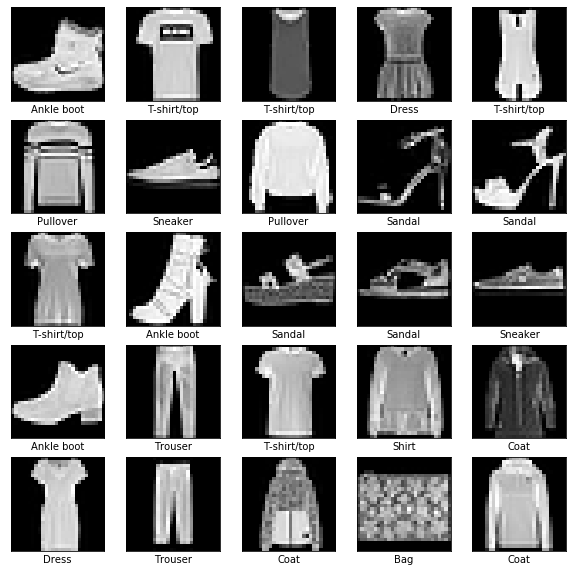

In [0]:
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
# reshape dataset to have a single channel
title={0:'T-shirt/top',1:'Trouser',2:'Pullover',3: 'Dress',4: 'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
pyplot.figure(figsize=(10,10))
for i in range(25):
	#
	# define subplot
	pyplot.subplot(5,5, 1 + i)
	# plot raw pixel data
	pyplot.xticks([])
	pyplot.yticks([])
	pyplot.grid()
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
	pyplot.xlabel(title[trainY[i]])
	# show the figure
pyplot.show()



In [0]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [0]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
trainX = train_norm / 255.0
testX = test_norm / 255.0

# return normalized images


In [0]:
#dyummy  model
## model = Sequential()
#model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(10, activation='softmax'))
## compile model
#opt = SGD(lr=0.01, momentum=0.9)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = Sequential()

### put the layer to the model ###

# Convolution （Conv2D）⇒ Pooling（MaxPooling2D）⇒Dropout

# 3×3 Convolutional filter
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout
model.add(Dropout(0.25))

# Convolution （Conv2D）⇒ Pooling（MaxPooling2D）⇒Dropout
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))

# classification layer
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# evaluate a model using k-fold cross-validation
#def evaluate_model(trainX, trainY, n_folds=5):
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)


train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
trainX = train_norm / 255.0
testX = test_norm / 255.0

n_folds=5
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(trainX):
    # define model
    model = model
    # select rows for train and test
    trainX, trainY, testX, testY = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)
#return scores, histories

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 41s 862us/step - loss: 0.2340 - acc: 0.9114 - val_loss: 0.2629 - val_acc: 0.9034
Epoch 2/10
48000/48000 [==============================] - 42s 865us/step - loss: 0.2262 - acc: 0.9134 - val_loss: 0.2556 - val_acc: 0.9073
Epoch 3/10
48000/48000 [==============================] - 41s 854us/step - loss: 0.2148 - acc: 0.9186 - val_loss: 0.2650 - val_acc: 0.9033
Epoch 4/10
48000/48000 [==============================] - 41s 851us/step - loss: 0.2088 - acc: 0.9205 - val_loss: 0.2696 - val_acc: 0.9021
Epoch 5/10
48000/48000 [==============================] - 41s 848us/step - loss: 0.2033 - acc: 0.9228 - val_loss: 0.2486 - val_acc: 0.9112
Epoch 6/10
48000/48000 [==============================] - 40s 827us/step - loss: 0.1951 - acc: 0.9261 - val_loss: 0.2585 - val_acc: 0.9062
Epoch 7/10
48000/48000 [==============================] - 40s 832us/step - loss: 0.1860 - acc: 0.9284 - val_loss: 0.

IndexError: ignored

In [0]:
history1 = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 43s 900us/step - loss: 0.6516 - acc: 0.7563 - val_loss: 0.4749 - val_acc: 0.8213
Epoch 2/10
48000/48000 [==============================] - 42s 869us/step - loss: 0.4251 - acc: 0.8427 - val_loss: 0.3475 - val_acc: 0.8705
Epoch 3/10
48000/48000 [==============================] - 42s 868us/step - loss: 0.3648 - acc: 0.8642 - val_loss: 0.3306 - val_acc: 0.8778
Epoch 4/10
48000/48000 [==============================] - 41s 853us/step - loss: 0.3372 - acc: 0.8742 - val_loss: 0.3003 - val_acc: 0.8877
Epoch 5/10
48000/48000 [==============================] - 41s 852us/step - loss: 0.3111 - acc: 0.8842 - val_loss: 0.2885 - val_acc: 0.8917
Epoch 6/10
48000/48000 [==============================] - 41s 850us/step - loss: 0.3018 - acc: 0.8879 - val_loss: 0.2834 - val_acc: 0.8939
Epoch 7/10
48000/48000 [==============================] - 41s 844us/step - loss: 0.2866 - acc: 0.8925 - val_loss: 0.

In [0]:
#history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
pyplot.plot((histories[0].history['loss'] ) )

IndexError: ignored

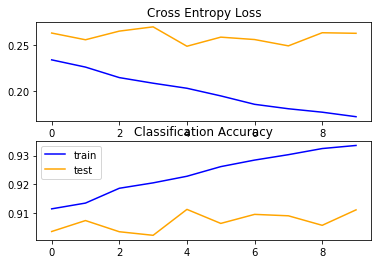

In [0]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.legend(loc='best')

In [0]:
print(len(histories[]) )

IndexError: ignored

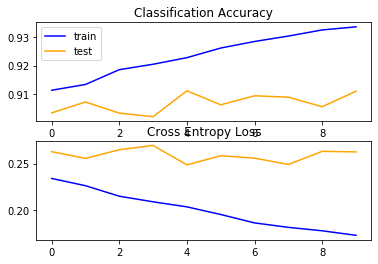

In [0]:
#plot diagnostic learning curves

for i in range(len(histories)):
    # plot loss
    pyplot.subplot(212)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(211)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['acc'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
    
pyplot.legend(loc='best' );
pyplot.show()

Accuracy: mean=88.458 std=0.000, n=1


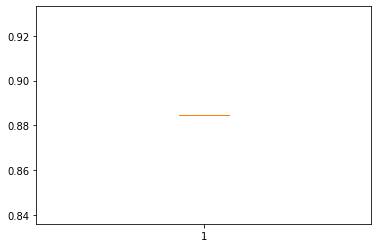

In [0]:
# summarize model performance
#def summarize_performance(scores):
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

In [0]:

# fit model
#model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)
# save model
model.save('final_model1.h5')



In [0]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [0]:
from keras.models import load_model
model = load_model('final_model1.h5')
# evaluate model on test dataset
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))


> 89.530


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


The label class is  :  2
 Which is  Pullover


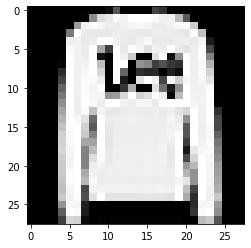

In [0]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, color_mode="grayscale", target_size=(28, 28))
    pyplot.imshow(img,cmap=pyplot.get_cmap('gray'))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img


    # load an image and predict the class
def run_example():
    title={0:'T-shirt/top',1:'Trouser',2:'Pullover',3: 'Dress',4: 'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
    # load the image
    img = load_image('/content/drive/My Drive/Colab Notebooks/FRI/11_nov_tunining_Dl/sample_image1.png')
    # load model
    model = load_model('final_model1.h5')
    # predict the class
    result = model.predict_classes(img)
    print("The label class is  : ",result[0] )
    print(" Which is ",title[result[0]])

    # entry point, run the example
run_example()


In [0]:
title={0:'T-shirt/top',1:'Trouser',2:'Pullover',3: 'Dress',4: 'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

    print(title[i] )

T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
